In [1]:
#import required modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
from Bio import SeqIO
from seqfold import dg
import matplotlib.pyplot as plt
from scipy.stats import anderson, wilcoxon, ttest_ind

In [17]:
#function for reading csvs
def get_numts(filename):
    global strain_names
    try:
        numts=pd.read_csv(f'/Volumes/motilin/balint/numt/mice_strains_numt/csvs/{filename}')
        strain=filename.split('.')[0].split('_')[-2]
        strain_names.append(strain)
        return numts
    except:
        strain_names.append(np.nan)
        return np.nan
    
strain_names=[]
filenames=pd.Series(os.listdir('/Volumes/motilin/balint/numt/mice_strains_numt/csvs/'))
numts=filenames.apply(get_numts)
numts.index=strain_names

In [18]:
#drop error and mus musculus
numts=numts.dropna()
numts=numts.drop('musculus')
numts

lpj                score      eg2_value        e_value g_id ...
c3hhej             score      eg2_value        e_value g_id ...
balbcj             score      eg2_value        e_value g_id ...
aj                 score  eg2_value   e_value g_id   g_start...
casteij            score      eg2_value        e_value g_id ...
nodshiltj          score      eg2_value        e_value g_id ...
akrj               score      eg2_value        e_value g_id ...
wsbeij             score      eg2_value        e_value g_id ...
dba2j              score      eg2_value        e_value g_id ...
129s1svimj         score      eg2_value        e_value g_id ...
pwkphj             score      eg2_value        e_value g_id ...
cbaj               score      eg2_value        e_value g_id ...
fvbnj              score      eg2_value        e_value g_id ...
c57bl6nj           score      eg2_value        e_value g_id ...
nzohiltj           score      eg2_value        e_value g_id ...
spreteij           score      eg2_value 

In [56]:
#function for reading annotations
def get_annotation(filename):
    global strain_names
    try:
        annotation=pd.read_csv(f'/Volumes/motilin/balint/numt/mice_strains_numt/mt_annotations/{filename}',
                              sep='\t',header=None)
        annotation.columns=['MT','start','end','name','sig','strand']
        annotation['length']=annotation.apply(lambda row: row['end']-row['start'],axis=1)
        strain=filename.split('.')[0]
        strain_names.append(strain)
        return annotation
    except:
        strain_names.append(np.nan)
        return np.nan
    
strain_names=[]
filenames=pd.Series(os.listdir('/Volumes/motilin/balint/numt/mice_strains_numt/mt_annotations/'))
annotations=filenames.apply(get_annotation)
annotations.index=strain_names

In [57]:
#drop error and mus musculus
annotations=annotations.dropna()
annotations=annotations.drop('mm')
annotations

cbaj                     MT  start    end        name       ...
aj                       MT  start    end        name       ...
akrj                     MT  start    end        name       ...
pwkphj                   MT  start    end        name       ...
129s1svimj               MT  start    end        name       ...
c57bl6nj                 MT  start    end        name       ...
lpj                      MT  start    end        name       ...
nodshiltj                MT  start    end        name       ...
spreteij                 MT  start    end        name       ...
balbcj                   MT  start    end        name       ...
casteij                  MT  start    end        name       ...
dba2j                    MT  start    end        name       ...
c3hhej                   MT  start    end        name       ...
fvbnj                    MT  start    end        name       ...
wsbeij                   MT  start    end        name       ...
nzohiltj                 MT  start    en

In [58]:
#function for getting trna ranges
def get_tRNA_ranges(annotation):
    tRNAs=annotation.loc[annotation['name'].str.contains('trn')]
    tRNA_range=tRNAs.apply(lambda row: np.arange(row['start'],row['end']),axis=1)
    tRNA_range.index=annotation.loc[annotation['name'].str.contains('trn')]['name']
    return tRNA_range

tRNA_ranges=annotations.apply(get_tRNA_ranges)

In [59]:
#function for getting numt ranges
def get_numt_ranges(numts):
    numts=numts.sort_values(by='mt_start')
    numt_range=numts.apply(lambda row: np.arange(row['mt_start'],row['mt_start']+row['mt_length']),axis=1)
    return numt_range

numt_ranges=numts.apply(get_numt_ranges)

In [81]:
#function for getting tRNA and numt ranges intersections
def tRNA_numt(strain_id):
    tRNA_range=tRNA_ranges.loc[strain_id].dropna()
    numt_range=numt_ranges.loc[strain_id].dropna()
    strain_spec_intersection=[]
    for tRNA in tRNA_range:
        trial=[]
        for numt in numt_range:
            if len(set(numt)&set(tRNA))>1:
                common_elements=list(set(numt)&set(tRNA))
                common_elements.sort()
                first_element=common_elements[0]
                last_element=common_elements[-1]
                numt_r=list(numt)
                numt_r.sort()
                trial.append((numt_r.index(first_element),numt_r.index(last_element)))
            else:
                trial.append(np.nan)
        strain_spec_intersection.append(trial)
    strain_spec_intersection=pd.Series(strain_spec_intersection)
    strain_spec_intersection.index=tRNA_range.index.values
    return strain_spec_intersection
    
intersections=pd.Series(numt_ranges.index.values).apply(tRNA_numt)
intersections.index=numt_ranges.index.values

In [82]:
intersections

,trnF(ttc),trnV(gta),trnL2(tta),trnI(atc),trnQ(caa),trnM(atg),trnW(tga),trnA(gca),trnN(aac),trnC(tgc),...,trnD(gac),trnK(aaa),trnG(gga),trnR(cga),trnH(cac),trnS1(agc),trnL1(cta),trnE(gaa),trnT(aca),trnP(cca)
lpj,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, (721,...","[nan, nan, (507, 575), nan, nan, nan, nan, nan...","[nan, nan, (573, 643), nan, nan, nan, nan, nan...","[nan, nan, (646, 714), nan, nan, nan, nan, nan...","[nan, (103, 169), nan, nan, nan, nan, (553, 61...","[nan, (171, 239), nan, nan, nan, nan, (621, 68...","[nan, (242, 312), nan, nan, nan, nan, (692, 76...","[nan, (345, 410), nan, nan, nan, nan, (795, 86...",...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, (150, 217)...","[nan, nan, nan, nan, nan, nan, nan, (218, 276)...","[nan, nan, nan, nan, nan, nan, nan, (276, 346)...","[(1583, 1651), nan, nan, nan, nan, nan, nan, n...","[(2801, 2867), nan, nan, (574, 640), (367, 433...","[nan, nan, nan, (641, 707), (434, 500), (0, 1)..."
c3hhej,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, (507, 575), nan, nan, nan, nan...","[nan, nan, nan, (573, 643), nan, nan, nan, nan...","[nan, nan, nan, (646, 714), nan, nan, nan, nan...","[nan, nan, (103, 169), nan, nan, nan, nan, nan...","[nan, nan, (171, 239), nan, nan, nan, nan, nan...","[nan, nan, (242, 312), nan, nan, nan, nan, nan...","[nan, nan, (345, 410), nan, nan, nan, nan, nan...",...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[(22, 90), (1203, 1258), nan, nan, nan, nan, n...","[(1240, 1306), nan, nan, nan, (574, 640), (367...","[nan, nan, nan, nan, (641, 707), (434, 500), n..."
balbcj,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, (507, 575), nan, nan, nan, nan...","[nan, nan, nan, (573, 643), nan, nan, nan, nan...","[nan, nan, nan, (646, 714), nan, nan, nan, nan...","[nan, nan, (103, 169), nan, nan, nan, nan, nan...","[nan, nan, (171, 239), nan, nan, nan, nan, nan...","[nan, nan, (242, 312), nan, nan, nan, nan, nan...","[nan, nan, (345, 410), nan, nan, nan, nan, nan...",...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[(21, 89), (1008, 1074), nan, nan, nan, nan, n...","[(1239, 1305), nan, nan, nan, (574, 640), nan,...","[nan, nan, nan, nan, (641, 707), nan, nan, (43..."
aj,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, (507, 575), nan, nan...","[nan, nan, nan, nan, nan, (573, 643), nan, nan...","[nan, nan, nan, nan, nan, (646, 714), nan, nan...","[nan, nan, nan, nan, (103, 169), nan, nan, nan...","[nan, nan, nan, nan, (171, 239), nan, nan, nan...","[nan, nan, nan, nan, (242, 312), nan, nan, nan...","[nan, nan, nan, nan, (345, 410), nan, nan, nan...",...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan,

In [137]:
#function for getting numt sequences
def get_numt_seq(row):
    numt_df=numts.loc[row.name]
    numt_df=numt_df.sort_values(by='mt_start')
    numt_df=numt_df.reset_index()
    strain_spec_seqs=[]
    for intersection in row:
        tRNA_spec_seq=[]
        for index,seq_range in enumerate(intersection):
            if type(seq_range)==tuple:
                seq=numt_df.loc[index]['g_sequence'][seq_range[0]:seq_range[1]+1].replace('-','').upper()
                tRNA_spec_seq.append(seq)
        tRNA_spec_seq.sort(reverse=True,key=len)
        if len(tRNA_spec_seq)!=0:
            strain_spec_seqs.append(tRNA_spec_seq[0])
        else:
            strain_spec_seqs.append(np.nan)
    strain_spec_seqs=pd.Series(strain_spec_seqs)
    return strain_spec_seqs

numt_sequences=intersections.apply(get_numt_seq,axis=1)

In [138]:
numt_sequences.columns=intersections.columns.values
numt_sequences

,trnF(ttc),trnV(gta),trnL2(tta),trnI(atc),trnQ(caa),trnM(atg),trnW(tga),trnA(gca),trnN(aac),trnC(tgc),...,trnD(gac),trnK(aaa),trnG(gga),trnR(cga),trnH(cac),trnS1(agc),trnL1(cta),trnE(gaa),trnT(aca),trnP(cca)
lpj,NaN,AGGGTACAGTTCATGAATGAAGTACATCTTCAGGTGAAATTAATAT...,ACACAGCCGGCCCATTCGCATTATTTTTTATAGCAGAGTATACTAA...,TTTCATTAAGTTCCTTTACTTGCTTATATGCTAGGGGTAAATAAAT...,TGTTCTATGGTACTAAATAATTTTATGTATGGTTCAAGAAGTAATT...,ATGCGGTGAATAATGGATGGGAAAAAGCCTAGTAAGGTTGAGAAAG...,CCAAACTAATCATTCTTGGCATAAAACGTGTTTTCATAAAATATTT...,AGACAAAGTCATGTTATAGCTAGAATGATGCCAATGTCTCCAGTGA...,TGCAGTATTTGTGTCTGCATAGTCCTACTACCATCCAATGAGGAGA...,GTGGGATCACTCAATGAAGCCTAAGAAACCAATGGATATTATAGCT...,...,TAATATGCCGGATGTTAGTAAAATGGCTGAGAAGCTCCTGTTAATG...,GCAAATAGATTTTCGTTCATTTTGATTCTCAAGGGTTTTTTGTTTT...,CACAAGGGACCCCACTTTCACTAATTCCAATACTTATTATTATTGA...,ATTTGTTTTGTCTG,ATTAAAAAAAAAATAAGATGATTGAAGGGAAAATGAGCCATTTATG...,AAATATAAAATATAATTAGTTCAGTTGTGGAGAAAGCTGGTAAGTA...,ATTCATTAAATATCTTACATTATTCCTAATTACCATACTCATTTTA...,AAGCCTGAAAATAATGGGAATCAGTGAATGAATCCTGCTATGATAG...,ATGACTCATTTGTTCAACGATTGAAGTCCTACATGATCTGAGTTCA...,ATTGGTAATTATGAATATAATTATAATATAATGAGTTGAAATTATT...
c3hhej,NaN,GAATGGGTAGGCCATATAAGATATATAGATTATTGATCTATAATTT...,TGCTTCCTGGGTTCAGGGAGTGTTGTTCATCTGCTAGGCTGTGGAT...,TTCTAAATTTAACTTCTGCTAGCCAAGGATTGCAAGATTTTATCTT...,CAACCGTGGCAGAAACAAACCAAGCCCTCTTCGACTTAACAGAAGA...,TGTCAAATAAGTCACTGGTCCACTCACACTAATTTTCATAGCCGAA...,TAAAAATTACCAAATGCATGACACCACAGTTATGTTGGTCATGGGC...,GATCTCTTATTTAAGGGGAACGTATGGGTGATAATGCATTTGATGG...,ATAAAGTTTCATATTAGCTACCCCCAAGTTTAATGGGCCCGGAGTG...,ACCAAATGTAGAAGGGGATAGTCGTATGGAAGAGAAGAGTTTATGA...,...,TAACGATTTTAAGGTTTTGGAAAGGGGATGTAGGGAACACTTGTAA...,ATAACTCTCCTTATTTTCCAAGAAAGTATGCAAGA,CTAGGACTAGGATTGATAAAATTAGGGCTAGTACTCCTCCTACTTT...,ATTTGTTTTGTCTG,TACTTTTGGCATCAGGAGTTATCAATCACCCAAGCTCATCACAGCC...,TCTGATTCTTCGGCCACCCAGAGGTATACATTTTAACTCTTCCGGG...,AAGCAATATTGTATAATCACATTGGAGACATTGGATTCATTTTAGA...,ATCTAAACTTTAAGGAGAGGGTATCAAGTACATTAAAATAGCTTAA...,AAATGAACTTATTATTGACCCAA,ATTGCTCATGGTAGGGGTAGTAGTAGGGAAATTTCTAGGTCAAATA...
balbcj,NaN,CATCATTTTCTATCTCAGATGGAATATATGGATCAACATTTTTTAT...,TGCTTCCTGGGTTCAGGGAGTGTTGTTCATCTGCTAGGCTGTGGAT...,TTCTAAATTTAACTTCTGCTAGCCAAGGATTGCAAGATTTTATCTT...,CGAACTCTTAAATAGGATTGTGCTGTTACCC,GATACCCTCTCCTTAAAGTTTATGAAAATTTTAAAGGAATTTGACACT,TAAAAATTACCAAATGCATGACACCACAGTTATGTTGGTCATGGGC...,GATCTCTTATTTAAGGGGAACGTATGGGTGATAATGCATTTGATGG...,ATAAAGTTTCATATTAGCTACCCCCAAGTTTAATGGGCCCGGAGTG...,ACCAAATGTAGAAGGGGATAGTCGTATGGAAGAGAAGAGTTTATGA...,...,CCTTCATAAAAATGTTTAGTTAACAACTGTCTATACCATTTCAACA...,ATAACTCTCCTTATTTTCCAAGAAAGTATGCAAGAA,TTTCGAAATATTTTAGTGGAACCATTTCTAGGACAATGGGTATAAA...,GTAGAGAGGGGAGGGCAATTATGATAAGGATTACAGCTGGTAGAAT...,TTCTACCATAGAGATATGATTTCATAATAACTCCATTACACTTGTA...,TATTCTGATTCTCCAGTCACCCAGAAGTTTATATTCTTATTCTCCC...,CCATACCCTACTGAACAAAAAGGCCTTCATTATGGAAGAACTCTAT...,TATCTAAACTTTAAGGAGAGGGTATCAAGTACATTAAAATAGCTTA...,TATCTATTTTTACTAATAATGCATTTTCTACTTTATCCTTACTAAT...,ATTGCTCATGGTAGGGGTAGTAGTAGGGAAATTTCTAGGTCAAATA...
aj,NaN,AATAAATGATCCTATAGAAGAGACTATATTTCATGTAGTATAGGCA...,ATATTTCTGACAAAAGAGTTACTTTGACAGAGTAAATAATAAAGAT...,TTATTCTCATAAATGCCCTAACAACTATTATTTTCCTAGGTCCACT...,AACTTTATTCAACTAATTTCATGACAGAAACCCTACTATTATCATC...,CTGAAACCAAAGTTTTCATTATGTTAAAATATTAGATGGAGATAGA...,CATTGAGATATCTTACTTAAGGAGATCATATGGGTGACAACACATT...,GAGTGCTAACTCCCATGTGTGGGAAGGTTGAAGATTAATTATATGG...,TGGGCCAGTGGTTGGCTTCGTGGAGGACGGTAGATGAATAGACCAA...,ATTGAGCTTGTTATAATTTTTCCTCACAGGGATAGGAGAA,...,AACCCACCAAACACATGCATATCATACAGTTTATAGTTAATCCAAT...,CAGGCCCACACATCAATCGATTCATTAAATATCTTA,CCTAGGAGGCTACTGACCATCAACAGGAATTACACCACTTAATCCA...,GAAGTTCTATTGGTAAAACAACTCGATTATCGACTTCTAGGAGGCA...,AGCTTTGGGTGCTGATGGTGGGGAATAGGTTCCTTCTTCTTGA,TGGTGATATTAAAATGATTACCAGCTATACTATGAGCCATAGGCTT...,GCTCTGGACCTACTATCCACAGCTACTCAACGAACAAGCCATCTGA...,,TGTCTTGAGAAGAGTGGTTCTTCATTT,AAAAGCCAGCAGCATGCTGCAGCTTCAAATCCATAATGATGCCTGG...
casteij,NaN,,ATTCTCATAGGAACATGAGGTGGACTTAAGCAAACACAAATGTGAA...,AAAGATCTGTCTAGCAAAAGAGTTACTTTGATAGTGTAAATTATAG...,CTAGGACAATAGGAATGGAATCTATAGCTAATAGTTCAAATACCTT...,CCACAGTGAGGGCAGCT

In [153]:
#get trna sizes
def get_tRNA_sizes(row):
    tRNA_sizes=[]
    for i in row:
        tRNA_sizes.append(len(i))
    tRNA_sizes=pd.Series(tRNA_sizes)
    tRNA_sizes.index=numt_sequences.columns.values
    return tRNA_sizes

tRNA_sizes=tRNA_ranges.apply(get_tRNA_sizes,axis=1)
tRNA_sizes

,trnF(ttc),trnV(gta),trnL2(tta),trnI(atc),trnQ(caa),trnM(atg),trnW(tga),trnA(gca),trnN(aac),trnC(tgc),...,trnD(gac),trnK(aaa),trnG(gga),trnR(cga),trnH(cac),trnS1(agc),trnL1(cta),trnE(gaa),trnT(aca),trnP(cca)
cbaj,68,69,75,69,71,69,67,69,71,66,...,70,65,68,69,68,59,71,69,67,67
aj,68,69,75,69,71,69,67,69,71,66,...,70,65,68,69,68,59,71,69,67,67
akrj,68,69,75,69,71,69,67,69,71,66,...,70,65,68,69,68,59,71,69,67,67
pwkphj,68,69,75,69,71,69,67,69,71,67,...,70,65,68,70,68,59,71,69,67,67
129s1svimj,68,69,75,69,71,69,67,69,71,66,...,70,65,68,69,68,59,71,69,67,67
c57bl6nj,68,69,75,69,71,69,67,69,71,66,...,70,65,68,69,68,59,71,69,67,67
lpj,68,69,75,69,71,69,67,69,71,66,...,70,65,68,70,68,59,71,69,67,67
nodshiltj,68,69,75,69,71,69,67,69,71,66,...,70,65,68,70,68,59,71,69,67,67
spreteij,67,69,75,69,71,69,67,69,71,67,...,69,65,68,69,68,59,71,69,67,68
balbcj,68,69,75,69,71,69,67,69,71,66,...,70,65,68,69,68,59,71,69,67,67


In [154]:
#check numt sizes
def numt_size_checker(row):
    sizes=row.apply(lambda seq:len(seq)
                   if type(seq)==str
                   else seq)
    return sizes

numt_sizes=numt_sequences.apply(numt_size_checker)
numt_sizes

,trnF(ttc),trnV(gta),trnL2(tta),trnI(atc),trnQ(caa),trnM(atg),trnW(tga),trnA(gca),trnN(aac),trnC(tgc),...,trnD(gac),trnK(aaa),trnG(gga),trnR(cga),trnH(cac),trnS1(agc),trnL1(cta),trnE(gaa),trnT(aca),trnP(cca)
lpj,NaN,69,66,69,71,69,67,69,71,66,...,69,65,68,14,68,57,71,69.0,66,66
c3hhej,NaN,69,66,69,71,69,67,69,71,66,...,68,35,68,14,68,59,66,69.0,23,67
balbcj,NaN,68,66,69,31,48,67,69,71,66,...,69,36,68,69,68,59,66,69.0,67,67
aj,NaN,69,66,69,71,69,67,69,71,40,...,70,36,68,69,43,58,68,0.0,27,67
casteij,NaN,0,67,69,71,69,67,69,71,67,...,53,39,68,68,68,59,71,69.0,67,56
nodshiltj,NaN,69,8,69,71,69,29,69,71,40,...,48,65,68,69,68,59,71,69.0,31,67
akrj,NaN,68,66,69,71,69,67,69,71,66,...,70,37,56,69,68,59,71,0.0,66,67
wsbeij,NaN,69,66,69,71,69,67,69,71,66,...,48,35,68,70,62,59,18,69.0,67,67
dba2j,NaN,26,67,69,71,69,67,69,71,66,...,49,65,64,27,68,59,46,0.0,31,67
129s1svimj,NaN,69,66,69,71,69,67,69,71,65,...,49,36,68,41,68,59,66,69.0,0,67


In [156]:
#function for getting mitochondrial sequences
def get_mt_seq(strain_name):
    mt_seq=''
    for seq_record in SeqIO.parse(f'/Volumes/motilin/balint/numt/mice_strains_numt/mt_fastas/{strain_name}.fa','fasta'):
        mt_seq=str(seq_record.seq)
    strain_spec_tRNAs=tRNA_ranges.loc[strain_name]
    tRNA_seqs=[]
    for tRNA_range in strain_spec_tRNAs:
        tRNA_seqs.append(mt_seq[tRNA_range[0]:tRNA_range[-1]])
    tRNA_seqs=pd.Series(tRNA_seqs)
    tRNA_seqs.index=tRNA_ranges.columns.values
    return tRNA_seqs
    
tRNA_sequences=pd.Series(numt_sequences.index.values).apply(get_mt_seq)
tRNA_sequences.index=numt_sequences.index.values
tRNA_sequences

,trnF(ttc),trnV(gta),trnL2(tta),trnI(atc),trnQ(caa),trnM(atg),trnW(tga),trnA(gca),trnN(aac),trnC(tgc),...,trnD(gac),trnK(aaa),trnG(gga),trnR(cga),trnH(cac),trnS1(agc),trnL1(cta),trnE(gaa),trnT(aca),trnP(cca)
lpj,GTTAATGTAGCTTAATAACAAAGCAAAGCACTGAAAATGCTTAGAT...,CATAGTGTAGCTTAATATTAAAGCATCTGGCCTACACCCAGAAGAT...,ATTAGGGTGGCAGAGCCAGGAAATTGCGTAAGACTTAAAACCTTGT...,AGAAATATGTCTGATAAAAGAATTACTTTGATAGAGTAAATTATAG...,CTAGGACAATAGGAATTGAACCTACACTTAAGAATTCAAAATTCTC...,AGTAAGGTCAGCTAATTAAGCTATCGGGCCCATACCCCGAAAACGT...,AGAAGTTTAGGATATACTAGTCCGCGAGCCTTCAAAGCCCTAAGAA...,TAAGGACTGTAAGACTTCATCCTACATCTATTGAATGCAAATCAAT...,CTAGATTGGCAGGAATTAAACCTACGAAAATTTAGTTAACAGCTAA...,AAGTCTTAGTAGAGATTTCTCTACACCTTCGAATTTGCAATTCGAC...,...,AAGATATTAGTAAAATCAATTACATAACTTTGTCAAAGTTAAATTA...,CACTATGAAGCTAAGAGCGTTAACCTTTTAAGTTAAAGTTAGAGAC...,ACTCCCTTAGTATAATTAATATAACTGACTTCCAATTAGTAGATTC...,TGGTAATTAGTTTAAAAAAAAAATTAATGATTTCGACTCATTAGAT...,GTGAATATAGTTTACAAAAAACATTAGACTGTGAATCTGACAACAG...,AAGAAAGATTGCAAGAACTGCTAATTCATGCTTCCATGTTTAAAAA...,ACTTTTATAGGATAATAGTAATCCATTGGTCTTAGGAACCAAAAAC...,TATTTCTACACAGCATTCAACTGCGACCAATGACATGAAAAATCAT...,GTCTTGATAGTATAAACATTACTCTGGTCTTGTAAACCTGAAATGA...,TCAAGAAGAAGGAGCTACTCCCCACCACCAGCACCCAAAGCTGGTA...
c3hhej,GTTAATGTAGCTTAATAACAAAGCAAAGCACTGAAAATGCTTAGAT...,CATAGTGTAGCTTAATATTAAAGCATCTGGCCTACACCCAGAAGAT...,ATTAGGGTGGCAGAGCCAGGAAATTGCGTAAGACTTAAAACCTTGT...,AGAAATATGTCTGATAAAAGAATTACTTTGATAGAGTAAATTATAG...,CTAGGACAATAGGAATTGAACCTACACTTAAGAATTCAAAATTCTC...,AGTAAGGTCAGCTAATTAAGCTATCGGGCCCATACCCCGAAAACGT...,AGAAGTTTAGGATATACTAGTCCGCGAGCCTTCAAAGCCCTAAGAA...,TAAGGACTGTAAGACTTCATCCTACATCTATTGAATGCAAATCAAT...,CTAGATTGGCAGGAATTAAACCTACGAAAATTTAGTTAACAGCTAA...,AAGTCTTAGTAGAGATTTCTCTACACCTTCGAATTTGCAATTCGAC...,...,AAGATATTAGTAAAATCAATTACATAACTTTGTCAAAGTTAAATTA...,CACTATGAAGCTAAGAGCGTTAACCTTTTAAGTTAAAGTTAGAGAC...,ACTCCCTTAGTATAATTAATATAACTGACTTCCAATTAGTAGATTC...,TGGTAATTAGTTTTAAAAAAAAATTAATGATTTCGACTCATTAGAT...,GTGAATATAGTTTACAAAAAACATTAGACTGTGAATCTGACAACAG...,AAGAAAGATTGCAAGAACTGCTAATTCATGCTTCCATGTTTAAAAA...,ACTTTTATAGGATAATAGTAATCCATTGGTCTTAGGAACCAAAAAC...,TATTTCTACACAGCATTCAACTGCGACCAATGACATGAAAAATCAT...,GTCTTGATAGTATAAACATTACTCTGGTCTTGTAAACCTGAAATGA...,TCAAGAAGAAGGAGCTACTCCCCACCACCAGCACCCAAAGCTGGTA...
balbcj,GTTAATGTAGCTTAATAACAAAGCAAAGCACTGAAAATGCTTAGAT...,CATAGTGTAGCTTAATATTAAAGCATCTGGCCTACACCCAGAAGAT...,ATTAGGGTGGCAGAGCCAGGAAATTGCGTAAGACTTAAAACCTTGT...,AGAAATATGTCTGATAAAAGAATTACTTTGATAGAGTAAATTATAG...,CTAGGACAATAGGAATTGAACCTACACTTAAGAATTCAAAATTCTC...,AGTAAGGTCAGCTAATTAAGCTATCGGGCCCATACCCCGAAAACGT...,AGAAGTTTAGGATATACTAGTCCGCGAGCCTTCAAAGCCCTAAGAA...,TAAGGACTGTAAGACTTCATCCTACATCTATTGAATGCAAATCAAT...,CTAGATTGGCAGGAATTAAACCTACGAAAATTTAGTTAACAGCTAA...,AAGTCTTAGTAGAGATTTCTCTACACCTTCGAATTTGCAATTCGAC...,...,AAGATATTAGTAAAATCAATTACATAACTTTGTCAAAGTTAAATTA...,CACTATGAAGCTAAGAGCGTTAACCTTTTAAGTTAAAGTTAGAGAC...,ACTCCCTTAGTATAATTAATATAACTGACTTCCAATTAGTAGATTC...,TGGTAATTAGTTTAAAAAAAAATTAATGATTTCGACTCATTAGATT...,GTGAATATAGTTTACAAAAAACATTAGACTGTGAATCTGACAACAG...,AAGAAAGATTGCAAGAACTGCTAATTCATGCTTCCATGTTTAAAAA...,ACTTTTATAGGATAATAGTAATCCATTGGTCTTAGGAACCAAAAAC...,TATTTCTACACAGCATTCAACTGCGACCAATGACATGAAAAATCAT...,GTCTTGATAGTATAAACATTACTCTGGTCTTGTAAACCTGAAATGA...,TCAAGAAGAAGGAGCTACTCCCCACCACCAGCACCCAAAGCTGGTA...
aj,GTTAATGTAGCTTAATAACAAAGCAAAGCACTGAAAATGCTTAGAT...,CATAGTGTAGCTTAATATTAAAGCATCTGGCCTACACCCAGAAGAT...,ATTAGGGTGGCAGAGCCAGGAAATTGCGTAAGACTTAAAACCTTGT...,AGAAATATGTCTGATAAAAGAATTACTTTGATAGAGTAAATTATAG...,CTAGGACAATAGGAATTGAACCTACACTTAAGAATTCAAAATTCTC...,AGTAAGGTCAGCTAATTAAGCTATCGGGCCCATACCCCGAAAACGT...,AGAAGTTTAGGATATACTAGTCCGCGAGCCTTCAAAGCCCTAAGAA...,TAAGGACTGTAAGACTTCATCCTACATCTATTGAATGCAAATCAAT...,CTAGATTGGCAGGAATTAAACCTACGAAAATTTAGTTAACAGCTAA...,AAGTCTTAGTAGAGATTTCTCTACACCTTCGAATTTGCAATTCGAC...,...,AAGATATTAGTAAAATCAATTACATAACTTTGTCAAAGTTAAATTA...,CACTATGAAGCTAAGAGCGTTAACCTTTTAAGTTAAAGTTAGAGAC...,ACTCCCTTAGTATAATTAATATAACTGACTTCCAATTAGTAGATTC...,TGGTAATTAGTTTAAAAAAAAATTAATGATTTCGACTCATTAGATT...,GTGAATATAGTTTACAAAAAACATTAGACTGTGAATCTGACAACAG...,AAGAA

In [159]:
#function for calculating delta G's
def dG_calc(strain_id):
    tRNA_lengths=tRNA_sizes.loc[strain_id]
    numt_lengths=numt_sizes.loc[strain_id]
    tRNA_Gs=[]
    numt_Gs=[]
    for index, length in enumerate(tRNA_lengths):
        if (length-numt_lengths[index])<(length/100)*5:
            tRNA_seq=tRNA_sequences.loc[strain_id][index]
            numt_seq=numt_sequences.loc[strain_id][index]
            tRNA_Gs.append(dg(tRNA_seq,temp=37))
            numt_Gs.append(dg(numt_seq,temp=37))
    return [tRNA_Gs,numt_Gs]
    
deltaGs=pd.Series(mt_sequences.index.values).apply(dG_calc)
deltaGs.index=mt_sequences.index.values
deltaGs

lpj           [[-4.2, -3.1, -3.1, -6.2, -3.1, -6.3, -2.6, -5...
c3hhej        [[-4.2, -3.1, -3.1, -6.2, -3.1, -6.3, -2.6, -5...
balbcj        [[-4.2, -3.1, -3.1, -6.3, -2.6, -5.5, -4.9, -2...
aj            [[-4.2, -3.1, -3.1, -6.2, -3.1, -6.3, -2.6, -4...
casteij       [[-3.1, -4.3, -6.2, -3.9, -6.3, -2.6, -6.5, -4...
nodshiltj     [[-4.2, -3.1, -3.1, -6.2, -6.3, -2.6, -4.9, -2...
akrj          [[-4.2, -3.1, -3.1, -6.2, -3.1, -6.3, -2.6, -5...
wsbeij        [[-4.2, -3.1, -3.1, -6.2, -3.1, -6.3, -2.6, -5...
dba2j         [[-3.1, -3.1, -6.2, -3.1, -6.3, -2.6, -5.5, -4...
129s1svimj    [[-4.2, -3.1, -3.1, -6.2, -3.1, -6.3, -2.6, -5...
pwkphj        [[-3.1, -5.0, -3.1, -6.3, -2.6, -2.2, -3.4, -6...
cbaj          [[-3.1, -6.3, -2.6, -4.9, -2.2, -1.7, -11.3, -...
fvbnj         [[-4.2, -3.1, -3.1, -6.2, -6.3, -2.6, -5.5, -4...
c57bl6nj      [[-2.4, -3.1, -3.1, -3.1, -6.3, -2.6, -5.5, -4...
nzohiltj      [[-3.1, -3.1, -3.1, -6.3, -2.6, -6.5, -4.9, -2...
spreteij      [[-4.1, -3.4, -4.6, -6.2, 

In [208]:
#function for statistical analysis
def statistics(deltaG):
    trna_normality=anderson(deltaG[0])
    trna_stat=trna_normality[0]
    trna_critical_value=trna_normality[1][2]

    numts_normality=anderson(deltaG[1])
    numts_stat=numts_normality[0]
    numts_critical_value=numts_normality[1][2]
    
    if (numts_stat > numts_critical_value) or (trna_stat > trna_critical_value):
        significance = wilcoxon(deltaG[0],deltaG[1])
    else:
        significance = ttest_ind(deltaG[0],deltaG[1])
    significance[1]
    return significance[1]
    
Pvalues=deltaGs.apply(statistics)
Pvalues

lpj           0.008223
c3hhej        0.104584
balbcj        0.059605
aj            0.127164
casteij       0.004779
nodshiltj     0.065399
akrj          0.013060
wsbeij        0.047898
dba2j         0.002426
129s1svimj    0.032764
pwkphj        0.002472
cbaj          0.009400
fvbnj         0.002764
c57bl6nj      0.116669
nzohiltj      0.040428
spreteij      0.053923
dtype: float64

In [246]:
#setting order
deltaGs=deltaGs.loc[['casteij','spreteij', 'pwkphj','wsbeij','lpj', 'c3hhej', 'balbcj','aj', 'nodshiltj', 'akrj','dba2j','129s1svimj', 
'cbaj', 'nzohiltj', 'fvbnj','c57bl6nj']]
deltaGs

casteij       [[-3.1, -4.3, -6.2, -3.9, -6.3, -2.6, -6.5, -4...
spreteij      [[-4.1, -3.4, -4.6, -6.2, -3.7, -6.3, -2.6, -6...
pwkphj        [[-3.1, -5.0, -3.1, -6.3, -2.6, -2.2, -3.4, -6...
wsbeij        [[-4.2, -3.1, -3.1, -6.2, -3.1, -6.3, -2.6, -5...
lpj           [[-4.2, -3.1, -3.1, -6.2, -3.1, -6.3, -2.6, -5...
c3hhej        [[-4.2, -3.1, -3.1, -6.2, -3.1, -6.3, -2.6, -5...
balbcj        [[-4.2, -3.1, -3.1, -6.3, -2.6, -5.5, -4.9, -2...
aj            [[-4.2, -3.1, -3.1, -6.2, -3.1, -6.3, -2.6, -4...
nodshiltj     [[-4.2, -3.1, -3.1, -6.2, -6.3, -2.6, -4.9, -2...
akrj          [[-4.2, -3.1, -3.1, -6.2, -3.1, -6.3, -2.6, -5...
dba2j         [[-3.1, -3.1, -6.2, -3.1, -6.3, -2.6, -5.5, -4...
129s1svimj    [[-4.2, -3.1, -3.1, -6.2, -3.1, -6.3, -2.6, -5...
cbaj          [[-3.1, -6.3, -2.6, -4.9, -2.2, -1.7, -11.3, -...
nzohiltj      [[-3.1, -3.1, -3.1, -6.3, -2.6, -6.5, -4.9, -2...
fvbnj         [[-4.2, -3.1, -3.1, -6.2, -6.3, -2.6, -5.5, -4...
c57bl6nj      [[-2.4, -3.1, -3.1, -3.1, 

In [247]:
#create a function for the statistical annotation of the graph
def annot_stat(star, x1, x2, y, h, ax=None):
    ax = plt.gca() if ax is None else ax
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='k')
    ax.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color='k')

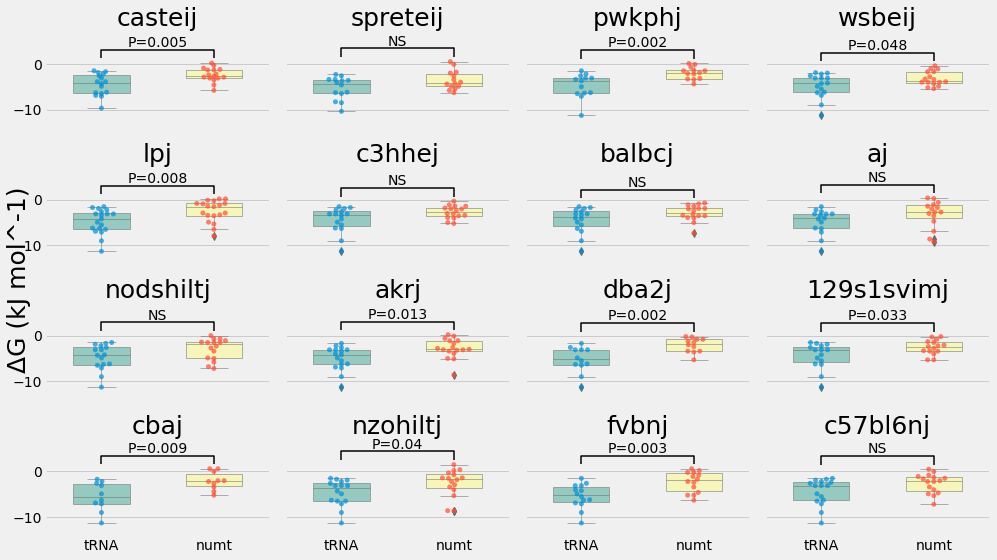

In [257]:
#function for plotting 
def plotter(deltaG):
    global row_tracker
    global column_tracker
    global indexer
    indexer+=1
    strain=deltaGs.index.values[indexer]
    if column_tracker==4:
        column_tracker+=-4
        row_tracker+=1
    sns.boxplot(
        data=deltaG,
        ax=axs[row_tracker,column_tracker],
        palette="Set3",
        linewidth=0.5,
        width=0.5
    )
    sns.swarmplot(
        data=deltaG,
        ax=axs[row_tracker,column_tracker],
        size=5,
        alpha=0.7
    )
    axs[row_tracker,column_tracker].set_title(strain,fontsize=25)
    if np.round(Pvalues[strain],3)<0.05:
        annot_stat(f'P={np.round(Pvalues[strain],3)}',0,1,max(deltaG[0]+deltaG[1])+1,1.9,axs[row_tracker,column_tracker])
    else:
        annot_stat('NS',0,1,max(deltaG[0]+deltaG[1])+1,1.9,axs[row_tracker,column_tracker])
    column_tracker+=1
    
plt.style.use('fivethirtyeight')    
fig,axs=plt.subplots(4,4,figsize=(14,8),sharey=True,sharex=True)
fig.text(0.01, 0.5, 'ΔG (kJ mol^-1)', va='center', rotation='vertical',fontsize=25)

row_tracker=0
column_tracker=0
indexer=-1
deltaGs.apply(plotter)
axs[3,0].set_xticklabels(['tRNA','numt'])
axs[3,0].set_ylim(-14,7)
plt.tight_layout()
plt.savefig('../../results/deltaGs.png', dpi=200)